# Final Project Submission

Please fill out:
* Student name: Cynthia Adisa Khasoha
* Student pace: / part time / 
* Scheduled project review date/time: 23/10/2023
* Instructor name: Samuel Karu

# Business Understanding

# Overview

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.We have three target categories : functional, functional needs repair and non functional 

# Business problem
Our stakeholder is an NGO (TZ_WATER) a who are trying to identify which pumps are functional, which need some repairs, and which don't work at all that will influence their decision to either build more wells or repair the ones existing

# Data Source

The source of my data will be the data containes 'Test_set_values.csv' and the 'Training_set values.csv'.Below are the details of the dataset

# Features of the dataset
The following is a set of information about the waterpoints:

*amount_tsh - Total static head (amount water available to waterpoint)

*date_recorded - The date the row was entered

*funder - Who funded the well

*gps_height - Altitude of the well

*installer - Organization that installed the well

*longitude - GPS coordinate

*latitude - GPS coordinate

*wpt_name - Name of the waterpoint if there is one

*num_private -

*basin - Geographic water basin

*subvillage - Geographic location

*region - Geographic location

*region_code - Geographic location (coded)

*district_code - Geographic location (coded)

*lga - Geographic location

*ward - Geographic location

*population - Population around the well

*public_meeting - True/False

*recorded_by - Group entering this row of data

*scheme_management - Who operates the waterpoint

*scheme_name - Who operates the waterpoint

*permit - If the waterpoint is permitted

*construction_year - Year the waterpoint was constructed

*extraction_type - The kind of extraction the waterpoint uses

*extraction_type_group - The kind of extraction the waterpoint uses

*extraction_type_class - The kind of extraction the waterpoint uses

*management - How the waterpoint is managed

*management_group - How the waterpoint is managed

*payment - What the water costs

*payment_type - What the water costs

*water_quality - The quality of the water

*quality_group - The quality of the water

*quantity - The quantity of water

*quantity_group - The quantity of water

*source - The source of the water

*source_type - The source of the water

*source_class - The source of the water

*waterpoint_type - The kind of waterpoint

*waterpoint_type_group - The kind of waterpoint

# Data Preparation

importing relevant libraries and Loading the dataset

In [175]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import  compute_sample_weight
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier


In [2]:
#using pandas to load the features dataset
features_df =pd.read_csv('c:/Users/six/Desktop/Moringa/phase_3/Project/data/Training_set_values.csv')
features_df.head(30)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
#target dataframe
target_df = pd.read_csv('c:/Users/six/Desktop/Moringa/phase_3/Project/data/Training_set_labels.csv')
target_df

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


# Data understanding

This section shows the characteristics and structure of our dataset.These are:

1. Overview of the data and the data types

 The data for this dataset comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water in showing the state of the existing water wells in the Tanzanian region as a whole. 
 The ministry aims to promote clean and portable water across Tanzania.

In [4]:
#getting a summary of the features dataframe
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
#getting summary of the target_df dataset
target_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


2. Shape of the data

In [6]:
# check no.of rows and columns in the features_df dataset
features_df.shape

(59400, 40)

3. Statistical summary of the data

In [7]:
features_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


4. Checking for missing values

In [8]:
#Check for missing values and a count of the missing values in features_df
features_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

from the results above we can see that there are a number of columns with significant missing values

In [9]:
#checking missing values in the target_df

target_df.isnull().sum()

id              0
status_group    0
dtype: int64

5. Checking for duplicate entries

In [10]:
features_df.duplicated().sum()

0

# Analysis
Given that there are a number of missing values in the various columns of our dataset, I first try to explore the relationship between the columns and our target variable which is the "Status_group" column in the target_df dataset.

1. I merge the two dataframes usinf the common identifier i.e the 'id' column

In [11]:
#merging using the 'pd.merge()' function 

merged_df = pd.merge(features_df, target_df, on='id', how='inner')
merged_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In my analysis , I believe the columns "subvillage" can be dropped given we can use the other location columns to identify the area, "permit" which will not be key in my analysis same to the "public meeting" column and drop the duplicate columns in the dataset

# Data Cleaning

1. Dropping unecessary columns and checking our dataset to see if there are duplicate column values

In [12]:
#dropping columns that are not necessary for my analysis
dropped_columns = ['subvillage', 'permit', 'public_meeting','id','lga','ward','region_code', 'wpt_name', 'extraction_type','payment', 'quality_group', 'waterpoint_type_group','num_private']


In [13]:

merged_df.drop(dropped_columns,axis=1,inplace=True)

In [14]:
#value counts of "funder" column
merged_df['funder'].head(30)

0                        Roman
1                      Grumeti
2                 Lottery Club
3                       Unicef
4                  Action In A
5          Mkinga Distric Coun
6                         Dwsp
7                        Rwssp
8                     Wateraid
9                  Isingiro Ho
10                     Private
11                      Danida
12                World Vision
13     Lawatefuka Water Supply
14                       Biore
15                       Rudep
16                      Unicef
17                      Unicef
18                      Hesawa
19                      Danida
20                         Twe
21                        Dwsp
22                      Unicef
23                         Isf
24    African Development Bank
25      Government Of Tanzania
26                      Sobodo
27                      Hesawa
28      Government Of Tanzania
29     Lawatefuka Water Supply
Name: funder, dtype: object

In [15]:
merged_df['installer'].head(30)

0                    Roman
1                  GRUMETI
2             World vision
3                   UNICEF
4                  Artisan
5                      DWE
6                     DWSP
7                      DWE
8                Water Aid
9                  Artisan
10                 Private
11                  DANIDA
12            World vision
13    Lawatefuka water sup
14                  WEDECO
15                     DWE
16                     DWE
17                     DWE
18                     DWE
19                   Danid
20                     TWE
21                     DWE
22                     DWE
23                     ISF
24                     DWE
25                     DWE
26             Kilolo Star
27                     DWE
28        District council
29    Lawatefuka water sup
Name: installer, dtype: object

These two columns have the same information so we can drop the 'funder' column and remain with the 'installer' column to reduce dimensionality and avoid multicollinearity. Also the 'installer' column contains more specific information about the organization or entity that installed the water well which is useful in my the analysis

In [16]:
#viewing the 'installer' variable against 'status_group'
merged_df.drop(columns=['funder'], inplace=True)

from the grapgh above we see that average

In [17]:
#confirming column has been dropped
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   district_code          59400 non-null  int64  
 9   population             59400 non-null  int64  
 10  recorded_by            59400 non-null  object 
 11  scheme_management      55523 non-null  object 
 12  scheme_name            31234 non-null  object 
 13  construction_year      59400 non-null  int64  
 14  extraction_type_group  59400 non-null  object 
 15  ex

Checking for other similar columns in the dateset

In [18]:
merged_df['scheme_management']. value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [19]:
merged_df['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

Given that these two columns provide similar if not the same information, we drop the 'scheme_name' column as it has more null values that might significantlly affect our predictions

In [20]:
#dropping 'shcheme_name'column

merged_df.drop('scheme_name', axis=1, inplace=True)

3. Check the structure of dataset after dealing with some of the Null values

In [21]:
merged_df.isna().sum()

amount_tsh                  0
date_recorded               0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
district_code               0
population                  0
recorded_by                 0
scheme_management        3877
construction_year           0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment_type                0
water_quality               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

I have dealt with the majority of the missing column values, now with the remaining columns "scheme_management" and "installer" I check how they affect our target variable and subsequently my analysis

4. Dealing with the 'installer' and 'scheme_management' columns

In [22]:
#for the installer column my approach in dealing with null values is to fill them with "other installer" value
merged_df['installer'].fillna('other installer', inplace=True)

In [23]:
#checking results

merged_df.isna().sum()

amount_tsh                  0
date_recorded               0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
basin                       0
region                      0
district_code               0
population                  0
recorded_by                 0
scheme_management        3877
construction_year           0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment_type                0
water_quality               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

Now to deal with the scheme_management null values. Here I decided to put "unkown" in the place of the missing values

In [24]:
# Replace NaN values with 'unknown' in the 'scheme_management' column

merged_df['scheme_management'].fillna('unknown', inplace=True)


In [25]:
#checking our dataset
merged_df.isna().sum()

amount_tsh               0
date_recorded            0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
population               0
recorded_by              0
scheme_management        0
construction_year        0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

checking our year of construction values, we see there are some years labelled as 0 so I replaced this with the year 1960. I start by displaying the data.

In [26]:
unique_construction_years = merged_df['construction_year'].unique()

# Display all unique construction years
print(unique_construction_years)

[1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]


In [27]:
# Replace 'construction_year' values with a range from 1960 to 2012
merged_df['construction_year'] = merged_df['construction_year'].apply(lambda x: min(x) if isinstance(x, range) else x)

In [28]:
merged_df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [85]:
#handling the 'amount_tsh' column
merged_df['amount_tsh'].fillna(0.0, inplace=True)


# Visualizations

1. Number of wells vs status

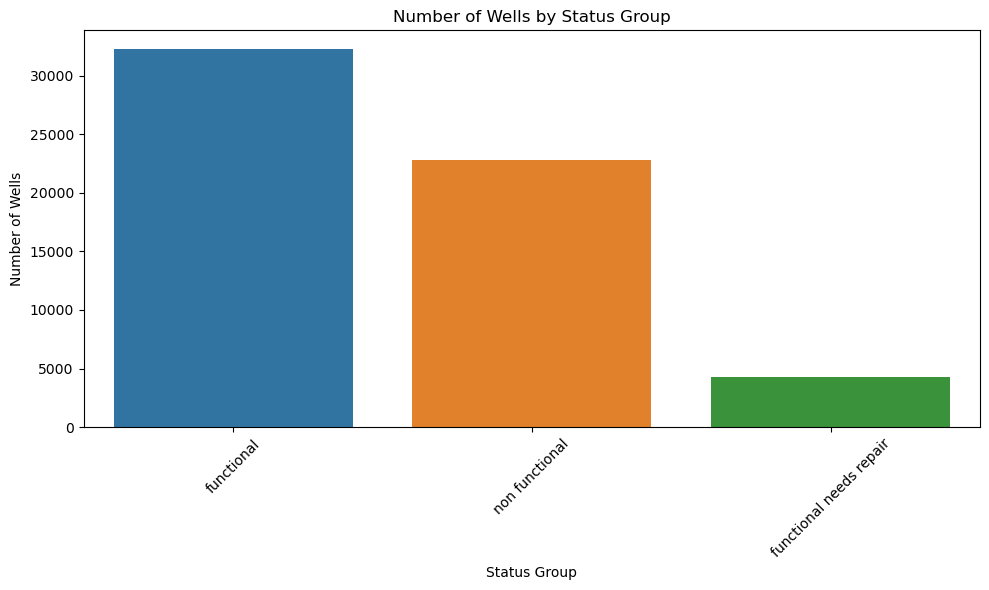

In [29]:
# Create a countplot
plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(data=merged_df, x='status_group')

# Add labels and title
plt.xlabel('Status Group')
plt.ylabel('Number of Wells')
plt.title('Number of Wells by Status Group')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

Fromt this we can see that there are more functional wells with the numbeers displayed in the below cells. They are more in number that the non functional and he ones that need repair

In [30]:
# Numner of wells in each category
merged_df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Viewing when the wells were constructed

In [31]:
construct_year =merged_df['construction_year']
construct_year

0        1999
1        2010
2        2009
3        1986
4           0
         ... 
59395    1999
59396    1996
59397       0
59398       0
59399    2002
Name: construction_year, Length: 59400, dtype: int64

1. Construction Year of Well vs status

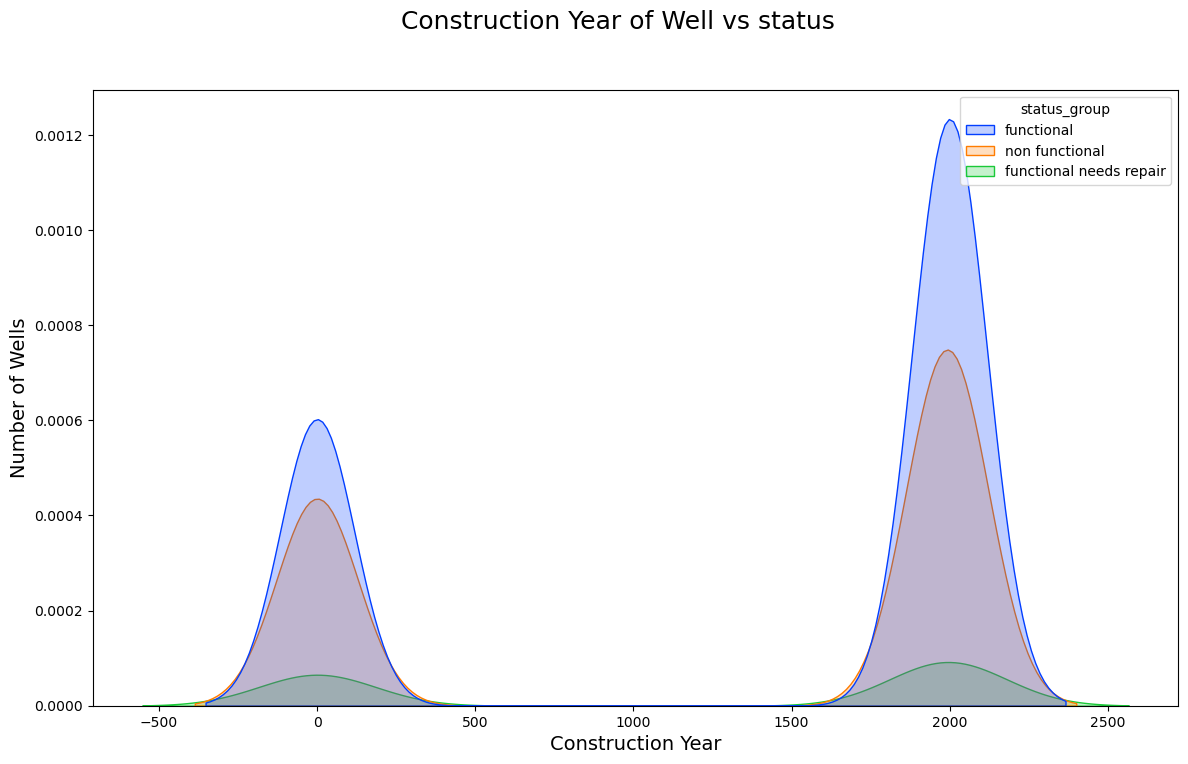

In [32]:
# Plot
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=merged_df, x=merged_df['construction_year'], hue='status_group', palette='bright', fill=True)

# Title and axis labels
fig.suptitle('Construction Year of Well vs status', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

Given that this plot shows there were more wells contructed in the year 1960 shows there were more non functional and functional wells, but in the recent years there are lesser non functional wells and less wells that need repair

3. Types of water vs status of well

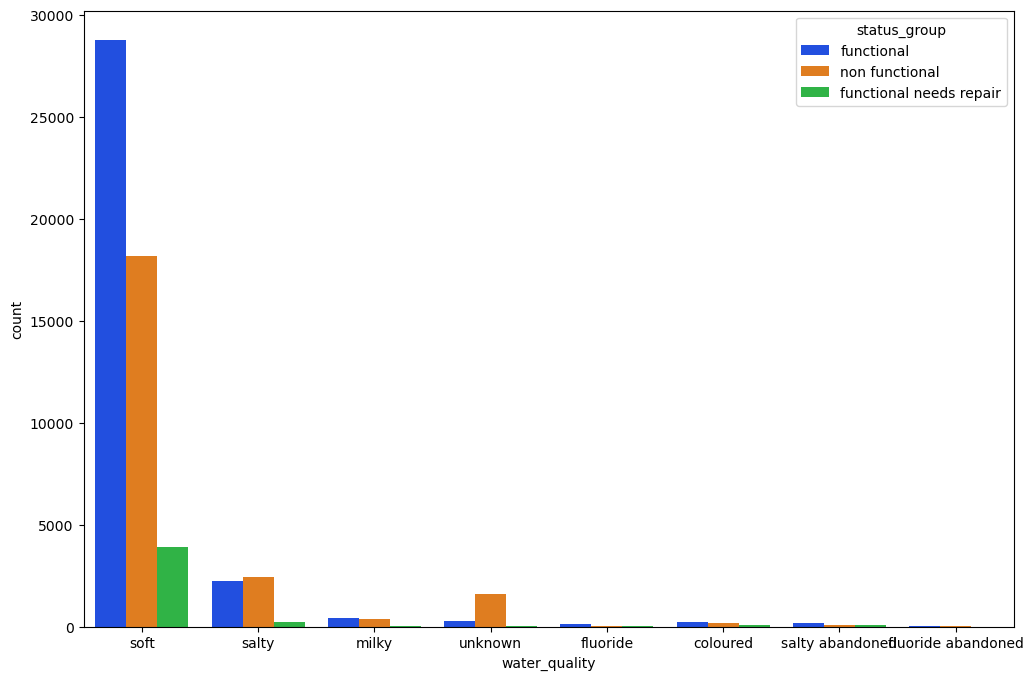

In [33]:
#checking water quality vs "status_group"
# Plot
plt.figure(figsize=(12,8))
ax = sns.countplot(x='water_quality', hue='status_group', palette='bright', data=merged_df)


Soft water quality has a high rate of functional waterpoints as well salty water.

4. source of water vs status group

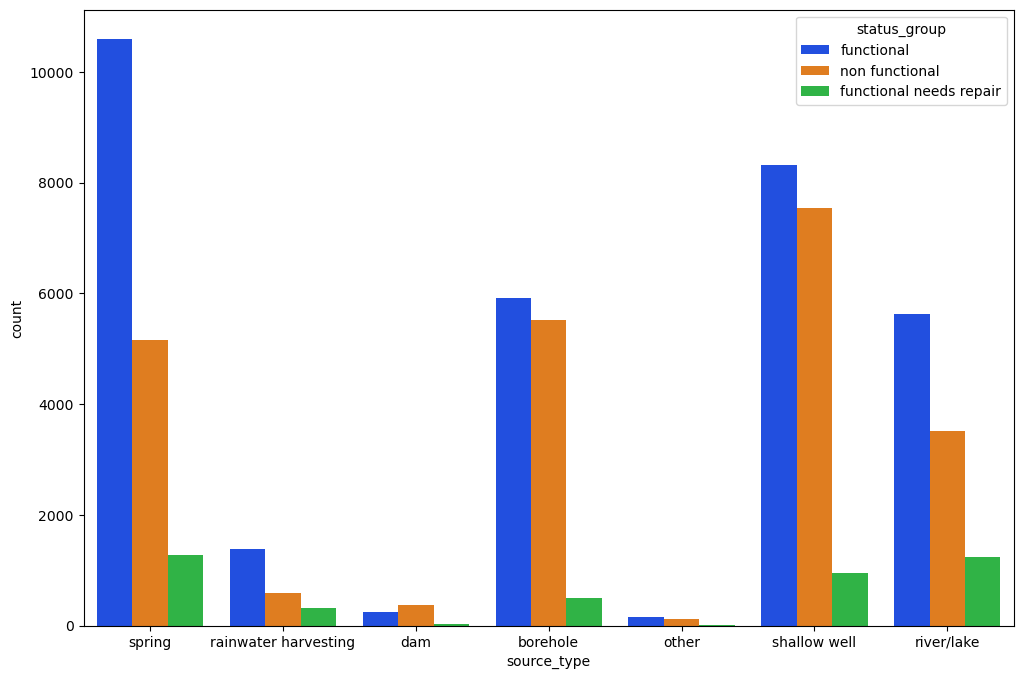

In [34]:
 # Plot
plt.figure(figsize=(12,8))
ax = sns.countplot(x='source_type', hue='status_group', palette='bright', data=merged_df);


from the plot we see more spring water wells are the most functional wells followed by shallow wells

5.waterpoint type of well vs status

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'communal standpipe'),
  Text(1, 0, 'communal standpipe multiple'),
  Text(2, 0, 'hand pump'),
  Text(3, 0, 'other'),
  Text(4, 0, 'improved spring'),
  Text(5, 0, 'cattle trough'),
  Text(6, 0, 'dam')])

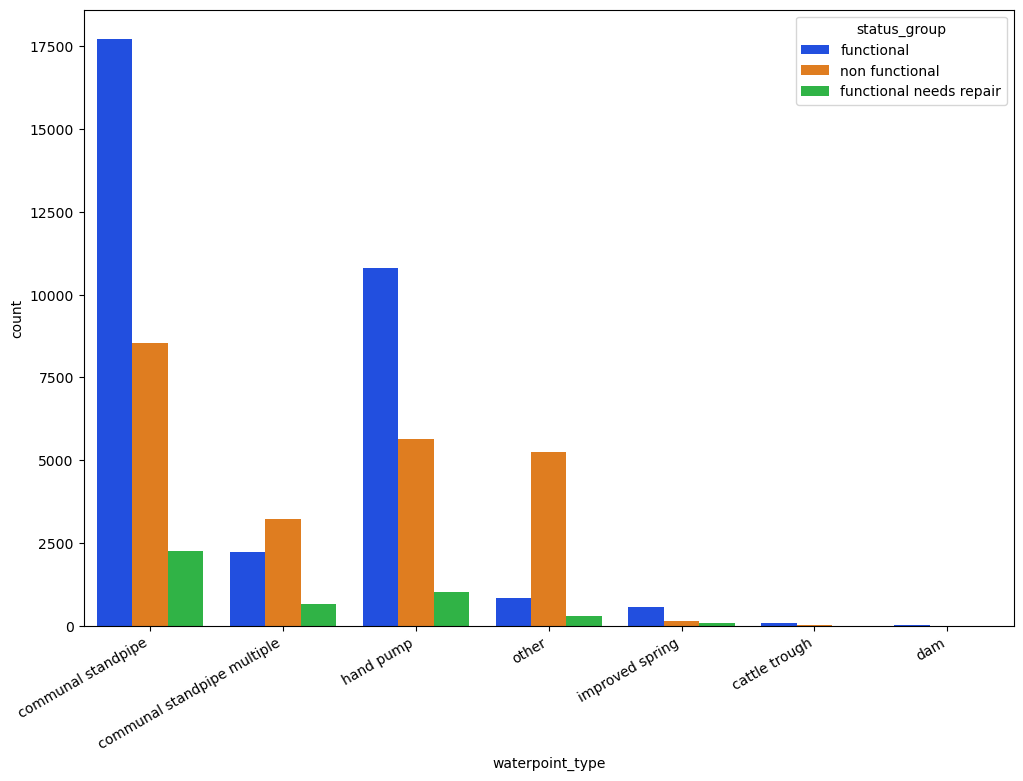

In [35]:
# Plot
plt.figure(figsize=(12,8))
ax = sns.countplot(x='waterpoint_type', hue='status_group', palette='bright', data=merged_df)
plt.xticks(rotation=30, ha='right')

here we see the communal sandpipe being the most functional wells while dams being the least

6. Installer vs status

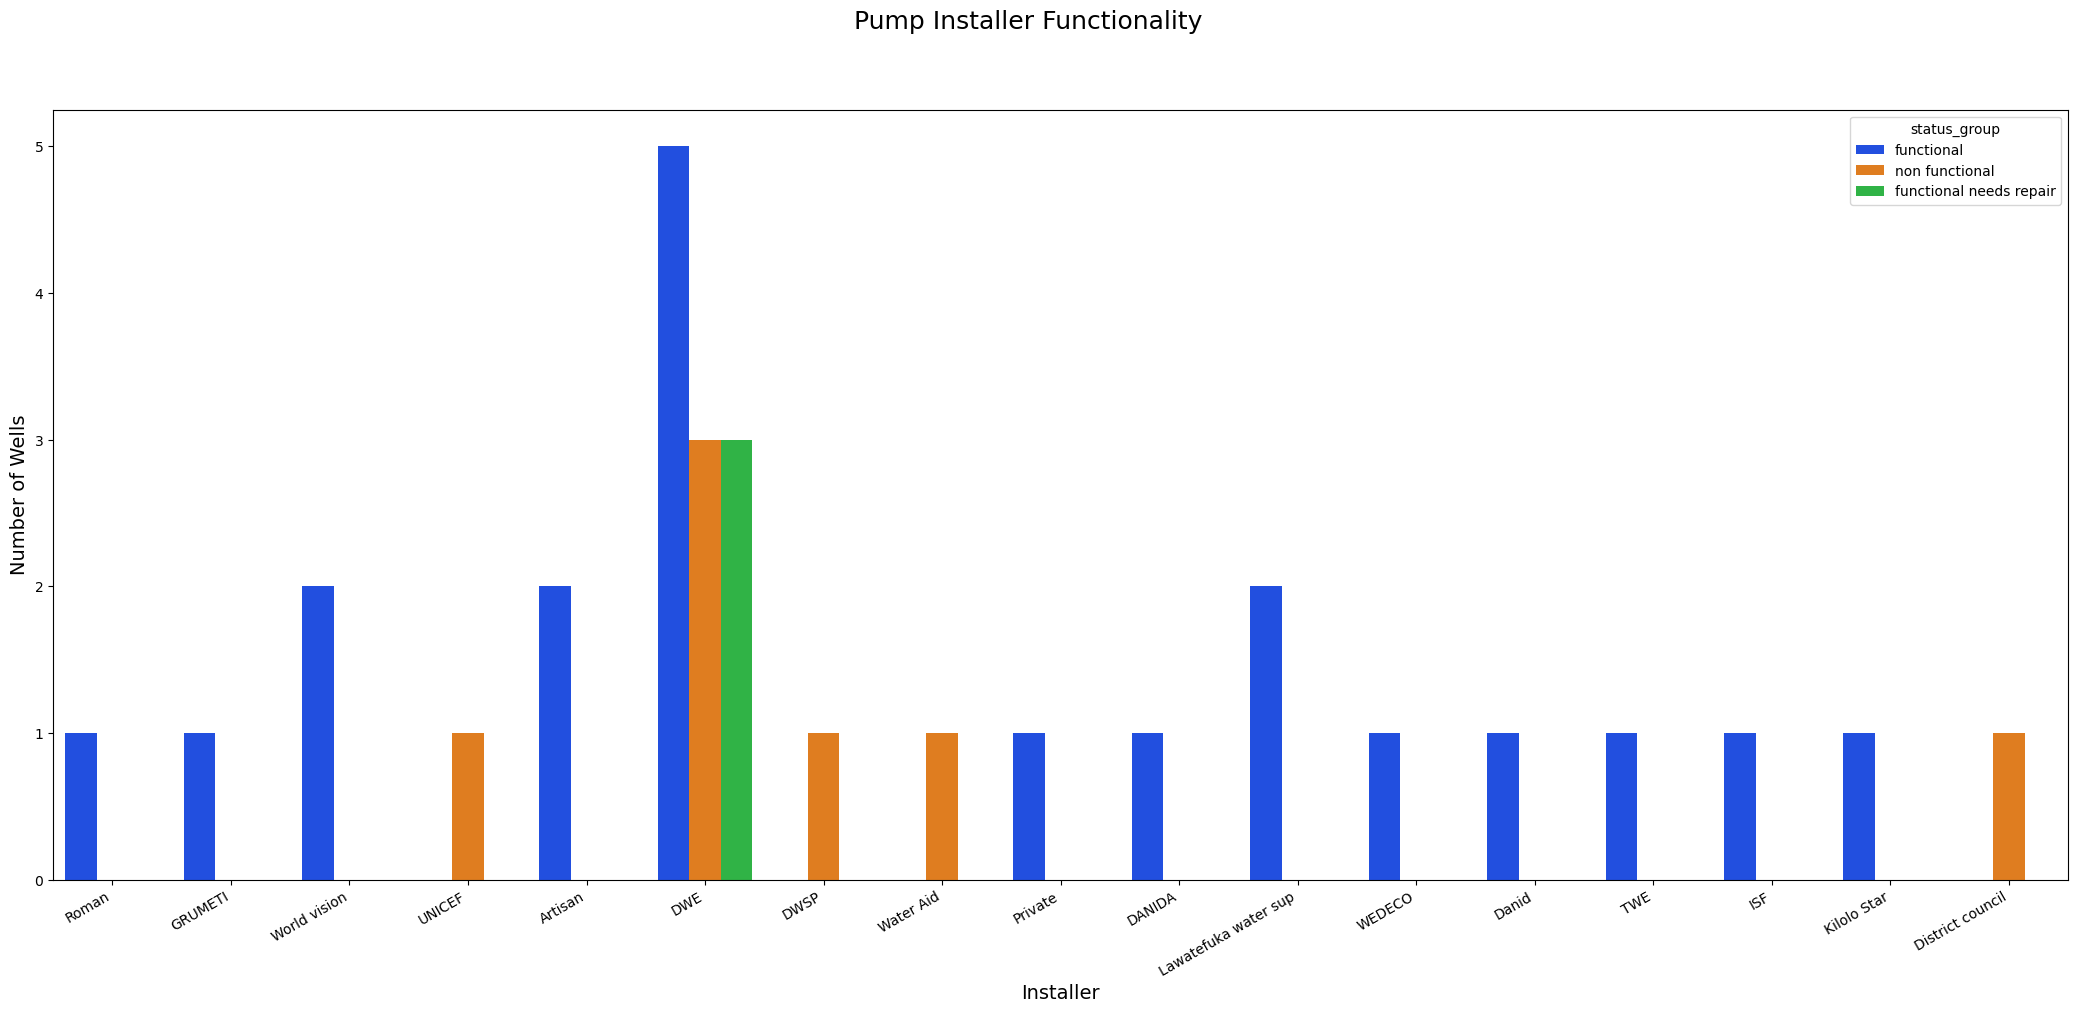

In [36]:
installer_summary = merged_df['installer'].head(30)
fig, ax = plt.subplots(figsize=(26,10))
ax = sns.countplot(x=installer_summary, hue="status_group", palette='bright', data=merged_df)

# Title and axis labels
fig.suptitle('Pump Installer Functionality', fontsize=18)
plt.xlabel("Installer", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
# Rotate x labels
plt.xticks(rotation=30, ha='right')

# Save fig
fig.savefig('./images/installer_function.jpeg')
plt.show();

from the grapgh DWE have the most functional and non functional wells

In [37]:
#finally checking for class imbalance
class_counts = merged_df['status_group'].value_counts()
class_counts

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [38]:
date = merged_df['date_recorded']
date

0        2011-03-14
1        2013-03-06
2        2013-02-25
3        2013-01-28
4        2011-07-13
            ...    
59395    2013-05-03
59396    2011-05-07
59397    2011-04-11
59398    2011-03-08
59399    2011-03-23
Name: date_recorded, Length: 59400, dtype: object

# Modelling

Aftercleang and having a few visualizations, and considering our target variable  I went ahead to perform a train test split to evaluate the effectiveness of our models and to do this I will carry out One Hot encoding and Printing the accuracy, precision score as well as a confusion matrix for the model

1. Dividing categories into numerical and categorical

In [39]:
#first viewing our column categories 

# List of numerical columns (int64 and float64 data types)
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# List of categorical columns (object data type)
categorical_columns = merged_df.select_dtypes(include=['object']).columns

print("Numerical columns:")
print(numerical_columns)

print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'district_code',
       'population', 'construction_year'],
      dtype='object')

Categorical columns:
Index(['date_recorded', 'installer', 'basin', 'region', 'recorded_by',
       'scheme_management', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment_type', 'water_quality',
       'quantity', 'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'status_group'],
      dtype='object')


In [40]:
merged_df2= merged_df.copy() # to protect original df , take the copy of it

In [137]:
#checking for cardinality of categorical variables
for column in categorical_columns:
    cardinality = len(merged_df[column].unique())
    print(f"{column}: {cardinality} unique values")


basin: 9 unique values
region: 21 unique values
recorded_by: 1 unique values
scheme_management: 13 unique values
extraction_type_group: 13 unique values
extraction_type_class: 7 unique values
management: 12 unique values
management_group: 5 unique values
payment_type: 7 unique values
water_quality: 8 unique values
quantity: 5 unique values
quantity_group: 5 unique values
source: 10 unique values
source_type: 7 unique values
source_class: 3 unique values
waterpoint_type: 7 unique values
status_group: 3 unique values


The categorical columns, such as "installer" with 2,146 unique values, and "date_recorded" with 356 unique values, have high cardinality(we can implement feature hashing for this).There are several categorical columns with relatively low cardinality, such as "basin" with 9 unique values and "extraction_type_class" with 7 unique values(we can apply oneHot encoding).The "recorded_by" column has only one unique value, which means it does not provide any useful information for modeling and can be safely dropped.

In [42]:
#drop "recorded_by"
merged_df.drop('recorded_by',axis=1)

,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,basin,region,district_code,population,...,management_group,payment_type,water_quality,quantity,quantity_group,source,source_type,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,...,user-group,annually,soft,enough,enough,spring,spring,groundwater,communal standpipe,functional
1,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,280,...,user-group,never pay,soft,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,250,...,user-group,per bucket,soft,enough,enough,dam,dam,surface,communal standpipe multiple,functional
3,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,...,user-group,never pay,soft,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
4,0.0,2011-07-13,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,0,...,other,never pay,soft,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,125,...,user-group,per bucket,soft,enough,enough,spring,spring,groundwater,communal standpipe,functional
59396,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,56,...,user-group,annually,soft,enough,enough,river,river/lake,surface,communal standpipe,functional
59397,0.0,2011-04-11,0,other installer,34.017087,-8.750434,Rufiji,Mbeya,7,0,...,user-group,monthly,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,functional
59398,0.0,2011-03-08,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,0,...,user-group,never pay,soft,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,functional


2. Feature hashing for high cardinality values (This hashes each category into a fixed number of columns. This reduces dimensionality)

In [50]:
from sklearn.feature_extraction import FeatureHasher

n_features = 20  # Number of features to hash to
hasher = FeatureHasher(n_features=n_features, input_type='string')


# Hashing the 'installer' column
hashed_installer = hasher.transform(merged_df['installer'].apply(lambda x: [x])).toarray()
installer_columns = [f'installer_hashed_{i}' for i in range(n_features)]
df_installer_hashed = pd.DataFrame(hashed_installer, columns=installer_columns)

# Hashing the 'date_recorded' column
hashed_date_recorded = hasher.transform(merged_df['date_recorded'].apply(lambda x: [x])).toarray()
date_recorded_columns = [f'date_recorded_hashed_{i}' for i in range(n_features)]
df_date_recorded_hashed = pd.DataFrame(hashed_date_recorded, columns=date_recorded_columns)

# Concatenate the hashed columns back to the original DataFrame
merged_df = pd.concat([merged_df, df_installer_hashed, df_date_recorded_hashed], axis=1)

# Drop the original 'installer' and 'date_recorded' columns 
merged_df = merged_df.drop(['installer', 'date_recorded'], axis=1)

3. One-hot encoding for the columns with relatively low cardinality

In [100]:
# Identify the categorical columns to one-hot encode (replace 'categorical_columns' with your actual column names)
categorical_columns = ['basin', 'region', 'recorded_by',
       'scheme_management', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment_type', 'water_quality',
       'quantity', 'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'status_group']

# Subset the DataFrame to select only the categorical columns
df_categorical = merged_df[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the categorical data
encoded_data = encoder.fit_transform(df_categorical)

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame with the one-hot encoded columns and column names
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([merged_df, encoded_df], axis=1)

# Drop the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)

c:\Users\six\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [143]:
for column in categorical_columns:
    value_counts = merged_df[column].value_counts()
    
    # Check if there are only two unique values (0 and 1)
    if len(value_counts) == 2 and set(value_counts.index) == {0, 1}:
        print(f"Column '{column}' is one-hot encoded.")

We now have a DataFrame with the one-hot encoded columns. Each unique category in the original categorical columns has been transformed into binary columns, representing the presence or absence of that category.

4. Train test split and setting up Random Forest classifier

In [169]:
X = merged_df.drop(['status_group'], axis=1).select_dtypes(['int', 'float'])
y = merged_df['status_group']

# Sample weights (if needed)
sample_weights = compute_sample_weight('balanced', y)

le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


print('Train Accuracy Score:', accuracy_score(y_hat_train, y_train))
print('Test Accuracy Score:', accuracy_score(y_val, y_hat))

Train Accuracy Score: 0.9904280904280904
Test Accuracy Score: 0.7367003367003367


The train accuracy score is high, at approximately 99.04%. This means that the model is able to correctly predict the target variable .High training accuracy suggests that the model has learned well from the training data and can fit the training data closely.However, very high training accuracy may also be a sign of overfitting, where the model has memorized the training data but may not generalize well to new, unseen data.The lower test accuracy indicates that the model's performance on the test data is not as high as its performance on the training data.



# Models

1. Baseline model(to determine if my model wil outdo the baseline)

In [176]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a majority class baseline classifier
baseline_model = DummyClassifier(strategy="most_frequent")

# Train the baseline model
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Baseline Model Accuracy: 0.5435
Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      6457
           1       0.00      0.00      0.00       851
           2       0.00      0.00      0.00      4572

    accuracy                           0.54     11880
   macro avg       0.18      0.33      0.23     11880
weighted avg       0.30      0.54      0.38     11880



c:\Users\six\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\six\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\six\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


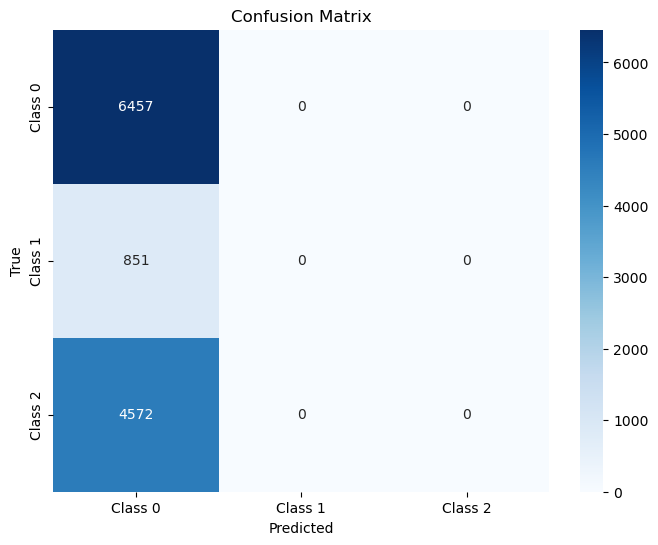

In [177]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

2. Random Forest Classifier model


In [173]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_hat_train = rf.predict(X_train)
y_hat = rf.predict(X_val)  

y_true = y_val  
y_pred = y_hat  

# Create the confusion matrix
confusion = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")
# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.4658
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      4839
           1       0.08      0.06      0.07       648
           2       0.38      0.36      0.37      3423

    accuracy                           0.47      8910
   macro avg       0.34      0.34      0.34      8910
weighted avg       0.45      0.47      0.46      8910



The Random Forest classifier's performance appears to be relatively weak, as indicated by the low accuracy and F1-scores, particularly for class 1. It has difficulty correctly classifying instances, especially for class 1.

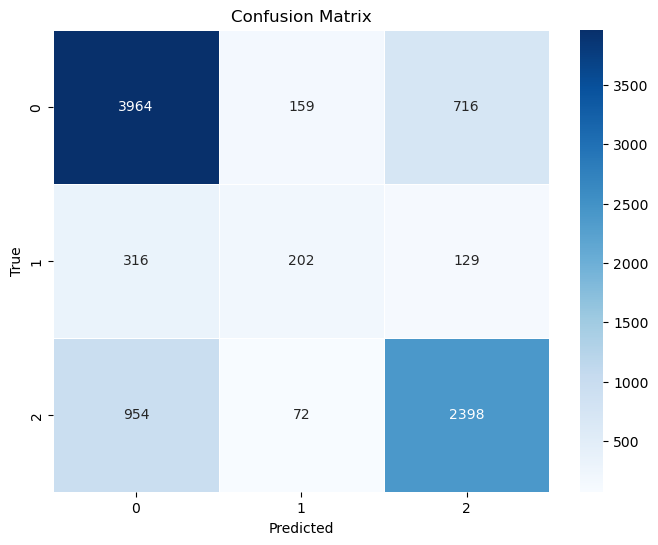

In [174]:

# Create of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

3. Logistic regression model

Tuning hyperparameters

In [161]:


# Define the hyperparameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logistic_reg = LogisticRegression(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Create a logistic regression model with the best hyperparameters
best_logistic_reg = LogisticRegression(C=best_C, random_state=42)

# Train the model with the best hyperparameters
best_logistic_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Best C: {best_C}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Best C: 10
Accuracy: 0.5747474747474748
Confusion Matrix:
[[4181    2  656]
 [ 547    0  101]
 [2483    0  940]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69      4839
           1       0.00      0.00      0.00       648
           2       0.55      0.27      0.37      3423

    accuracy                           0.57      8910
   macro avg       0.38      0.38      0.35      8910
weighted avg       0.53      0.57      0.52      8910



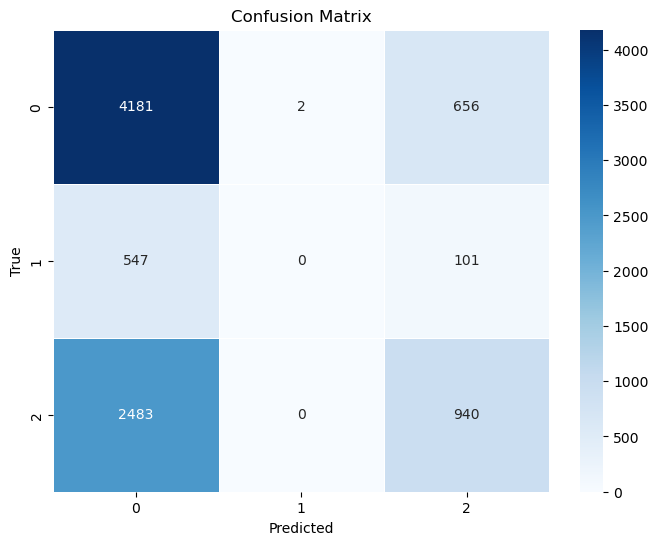

In [162]:
# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Even after tuning our model, based on this classification report, it performs relatively well for class 0 but poorly for class 1, with class 2 falling in between

4.KNN Classifier

In [165]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with a specific value of k (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6642255892255893
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6457
           1       0.39      0.24      0.29       851
           2       0.66      0.58      0.61      4572

    accuracy                           0.66     11880
   macro avg       0.58      0.53      0.55     11880
weighted avg       0.65      0.66      0.66     11880



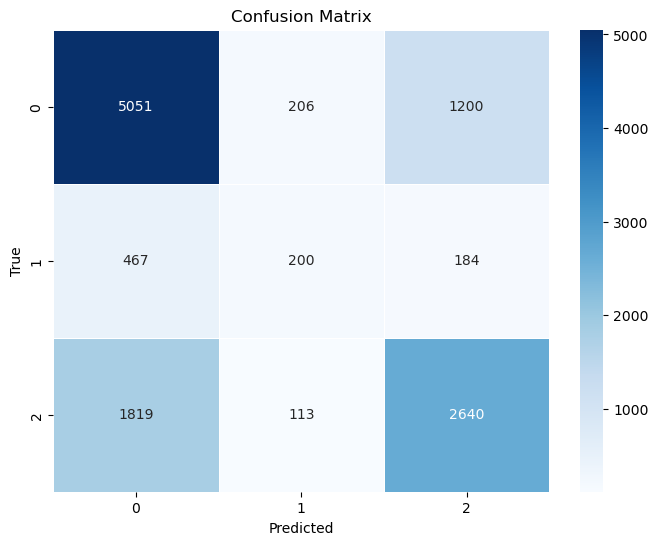

In [166]:
# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In summary, the KNN classifier performs well for class 0, with relatively high precision, recall, and F1-score. However, its performance is lower for class 1 and class 2, where precision and recall are not as high.

# Final Model Evaluation

The K-Nearest Neighbors (KNN) classifier's performance appears to be moderate, with an accuracy of 66.42%. It is better at predicting in comparison to the other 2 models. It performed better overally hence my choice for it
